Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
diabetes_dataset = pd.read_csv('./dataset/diabetes.csv') 

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

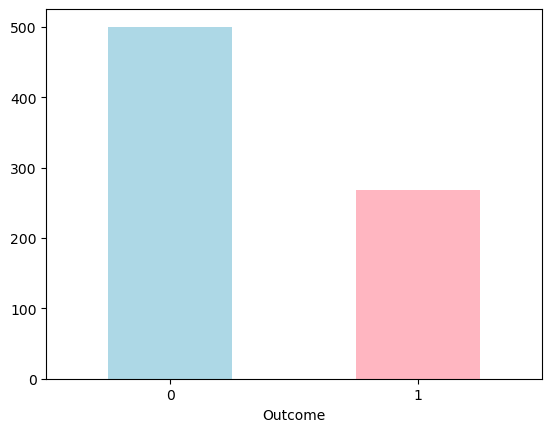

In [7]:
diabetes_dataset['Outcome'].value_counts().plot(kind="bar",color=["lightblue","lightpink"]);
plt.xticks(rotation=0);

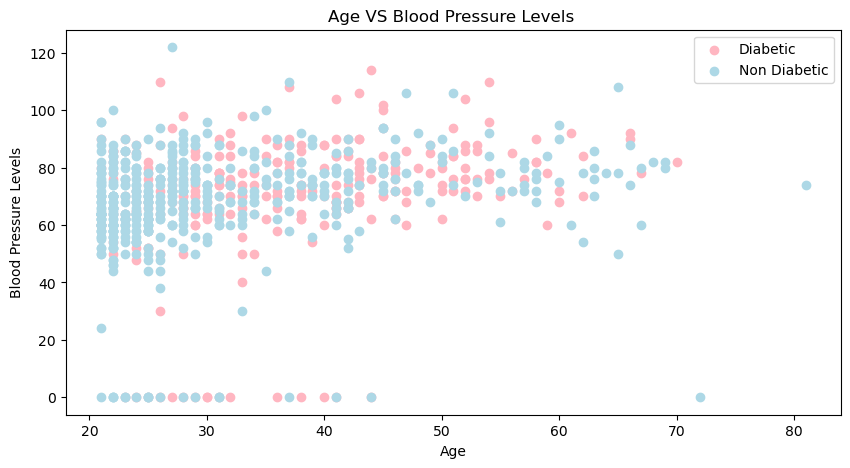

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(diabetes_dataset.Age[diabetes_dataset.Outcome==1],
            diabetes_dataset.BloodPressure[diabetes_dataset.Outcome==1],color="lightpink",label="Diabetic")


plt.scatter(diabetes_dataset.Age[diabetes_dataset.Outcome==0],
            diabetes_dataset.BloodPressure[diabetes_dataset.Outcome==0],color="lightblue",label="Non Diabetic")
plt.title("Age VS Blood Pressure Levels ")
plt.xlabel("Age")
plt.ylabel("Blood Pressure Levels")
plt.legend();

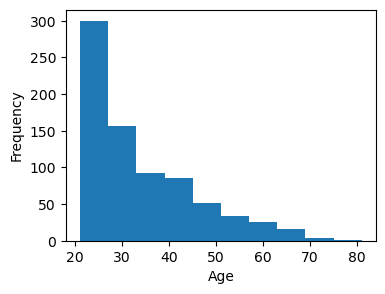

In [9]:
# Checking the distribution of Age coloumn in the data set

plt.figure(figsize=(4,3));
diabetes_dataset.Age.plot.hist();
plt.xlabel("Age")
plt.ylabel("Frequency");


In [10]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
# Separating the features and labels
x = diabetes_dataset.drop(columns = 'Outcome', axis=1)
y = diabetes_dataset['Outcome']

In [12]:
#Splliting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y)

In [13]:
print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


# We will be trying 3 different Machine Learning Models

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Support Vector Machine

In [14]:
# Using a Dictionary 
models = {
          "Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "SVM":svm.SVC(kernel='linear')
         }

In [15]:
#Function for training all models and getting model scores
def fitandscore(models,x_train,y_train,x_test,y_test):
    
    
    dict_score={}
    
    for name,model in models.items():
        model.fit(x_train,y_train)
        dict_score[name]=model.score(x_test,y_test)
        
    return dict_score 


In [16]:
#accuracy scores of these models
model_scores=fitandscore(models,x_train,y_train,x_test,y_test)
model_scores

C:\Users\amits\Desktop\FINAL1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7337662337662337,
 'KNN': 0.6818181818181818,
 'SVM': 0.7337662337662337}

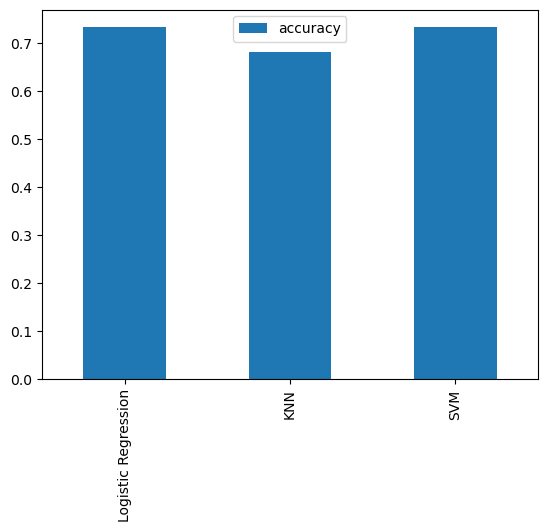

In [17]:
#Comparing models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [18]:
#Saving the SVM model with highest test accuracy
import pickle

In [19]:
filename = 'diabetes_model.sav'
pickle.dump(models["SVM"], open(filename, 'wb'))

In [20]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [21]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\amits\Desktop\FINAL1\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
